# Chapter: Data Preprocessing

# Topic: Multivariate outlier detection via MCD-based Mahalanobis distances

Mounted at /content/drive/
[Errno 2] No such file or directory: '/content/drive/My drive/hanhwa_AA/'
/content
Cloning into 'Hanhwa_AA'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 32 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (32/32), done.


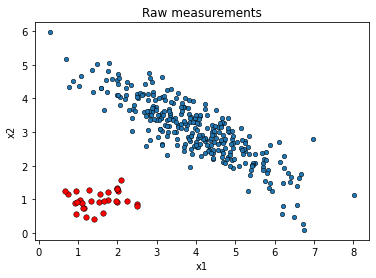

In [1]:
# read data
import numpy as np

import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive/')

%cd "/content/drive/My drive/hanhwa_AA/"

!git clone https://github.com/SungKu/Hanhwa_AA.git

linkpath = "/content/drive/My Drive/hanhwa_AA/"
dirname = os.getcwd()

data_pth = os.path.join(linkpath,'complex2D_outlier.csv')
data_2Doutlier = pd.read_csv(data_pth).values

# plot
import matplotlib.pyplot as plt
plt.plot(data_2Doutlier[:-30,0], data_2Doutlier[:-30,1], '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(data_2Doutlier[-30:,0], data_2Doutlier[-30:,1], '.r', markeredgecolor='k', markeredgewidth=0.5, ms=11)
plt.xlabel('x1'), plt.ylabel('x2')
plt.title('Raw measurements')
plt.show()

In [2]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                    Non-robust Mahalanobis distances
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [3]:
# compute Mahalanobis distances
from sklearn.covariance import EmpiricalCovariance

emp_cov = EmpiricalCovariance().fit(data_2Doutlier)
MD_emp_cov = emp_cov.mahalanobis(data_2Doutlier)

In [4]:
# transform Mahalanobis distances into normal distribution via cubic-root
MD_emp_cov_cubeRoot = np.power(MD_emp_cov, 0.333)

In [5]:
# find hampel identifier bounds
from scipy import stats

median = np.median(MD_emp_cov_cubeRoot)
sigma_MAD = stats.median_absolute_deviation(MD_emp_cov_cubeRoot)

upperBound_MD_emp_cov = np.power(median+3*sigma_MAD, 3)
lowerBound_MD_emp_cov = np.power(median-3*sigma_MAD, 3)

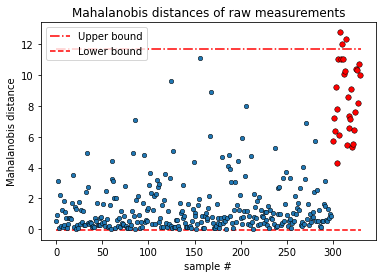

In [6]:
# plot Mahalanobis distances with bounds
plt.figure()
plt.plot(MD_emp_cov[:-30], '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(np.arange(300,330), MD_emp_cov[-30:], '.r', markeredgecolor='k', markeredgewidth=0.5, ms=11)

plt.hlines(upperBound_MD_emp_cov, 0, 330, colors='r', linestyles='dashdot', label='Upper bound') 
plt.hlines(lowerBound_MD_emp_cov, 0, 330, colors='r', linestyles='dashed', label='Lower bound') 

plt.xlabel('sample #'), plt.ylabel('Mahalanobis distance')
plt.title('Mahalanobis distances of raw measurements')
plt.legend(loc='upper left')
plt.show()

In [7]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                    MCD-based robust Mahalanobis distances
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
from sklearn.covariance import MinCovDet

MCD_cov = MinCovDet().fit(data_2Doutlier)
MD_MCD = MCD_cov.mahalanobis(data_2Doutlier)

In [8]:
# transform Mahalanobis distances into normal distribution via cubic-root
MD_MCD_cubeRoot = np.power(MD_MCD, 0.333)

In [9]:
# find hampel identifier bounds
from scipy import stats

median = np.median(MD_MCD_cubeRoot)
sigma_MAD = stats.median_absolute_deviation(MD_MCD_cubeRoot)

upperBound_MD_emp_cov = np.power(median+3*sigma_MAD, 3)
lowerBound_MD_emp_cov = np.power(median-3*sigma_MAD, 3)

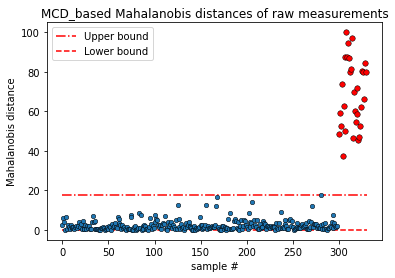

In [10]:
# plot Mahalanobis distances with bounds
plt.figure()
plt.plot(MD_MCD[:-30], '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(np.arange(300,330), MD_MCD[-30:], '.r', markeredgecolor='k', markeredgewidth=0.5, ms=11)

plt.hlines(upperBound_MD_emp_cov, 0, 330, colors='r', linestyles='dashdot', label='Upper bound') 
plt.hlines(lowerBound_MD_emp_cov, 0, 330, colors='r', linestyles='dashed', label='Lower bound') 

plt.xlabel('sample #'), plt.ylabel('Mahalanobis distance')
plt.title('MCD_based Mahalanobis distances of raw measurements')
plt.legend(loc='upper left')
plt.show()